## Section A (If you have already filtered the data and saved it as an Excel file, proceed to Section B)

In [78]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")

## Read the popluation file with conditions

In [79]:
df = pd.read_excel('./../DataFiles/Population in Seoul 20250124.xlsx', header=2, usecols = 'B, H, I, K, L, N')

In [80]:
df.head()

,동별(2),남자.1,여자.1,남자.2,여자.2,소계.5
0,소계,4505355,4826473,114608,150936,1824895
1,종로구,66570,71766,4795,6477,29840
2,중구,58015,62529,4909,5761,26853
3,용산구,97469,106385,7071,6269,39407
4,성동구,132409,141260,3166,4454,51245


## Translation

In [81]:
# Uncomment this to install googletrans
# !pip install googletrans==4.0.0-rc1

In [82]:
from googletrans import Translator
translator = Translator()

In [83]:
translator.translate('안녕하세요', src='ko', dest='en').text

'hello'

In [84]:
df.columns

Index(['동별(2)', '남자.1', '여자.1', '남자.2', '여자.2', '소계.5'], dtype='object')

In [85]:
df = df.rename(columns=dict(zip(df.columns, ['지역구', '남성 내국인들', '여성 내국인들', '남성 외국인들', '여성 외국인들', '고령자들'])))

In [86]:
df.columns

Index(['지역구', '남성 내국인들', '여성 내국인들', '남성 외국인들', '여성 외국인들', '고령자들'], dtype='object')

In [87]:
newCol = [translator.translate(each, src='ko', dest='en').text for each in df.columns]

In [88]:
newCol

['District',
 'Male Koreans',
 'Female Koreans',
 'Male foreigners',
 'Female foreigners',
 'Elderly people']

In [89]:
df = df.rename(columns=dict(zip(df.columns, newCol)))

In [90]:
df.head()

,District,Male Koreans,Female Koreans,Male foreigners,Female foreigners,Elderly people
0,소계,4505355,4826473,114608,150936,1824895
1,종로구,66570,71766,4795,6477,29840
2,중구,58015,62529,4909,5761,26853
3,용산구,97469,106385,7071,6269,39407
4,성동구,132409,141260,3166,4454,51245


In [92]:
df['District'] = [translator.translate(each, src='ko', dest='en').text for each in df['District']]

In [93]:
df.head()

,District,Male Koreans,Female Koreans,Male foreigners,Female foreigners,Elderly people
0,subtotal,4505355,4826473,114608,150936,1824895
1,Jongno -gu,66570,71766,4795,6477,29840
2,Jung -gu,58015,62529,4909,5761,26853
3,Yongsan -gu,97469,106385,7071,6269,39407
4,Seongdong -gu,132409,141260,3166,4454,51245


## Correct a minor translation error

In [94]:
df['District'][1] = 'Jongro -gu'

In [95]:
df.head()

,District,Male Koreans,Female Koreans,Male foreigners,Female foreigners,Elderly people
0,subtotal,4505355,4826473,114608,150936,1824895
1,Jongro -gu,66570,71766,4795,6477,29840
2,Jung -gu,58015,62529,4909,5761,26853
3,Yongsan -gu,97469,106385,7071,6269,39407
4,Seongdong -gu,132409,141260,3166,4454,51245


## Remove the first row; the totals can sometimes be problematic. 

In [96]:
df = df.drop([0])

In [97]:
df = df.reset_index(drop=True)

In [98]:
df.head()

,District,Male Koreans,Female Koreans,Male foreigners,Female foreigners,Elderly people
0,Jongro -gu,66570,71766,4795,6477,29840
1,Jung -gu,58015,62529,4909,5761,26853
2,Yongsan -gu,97469,106385,7071,6269,39407
3,Seongdong -gu,132409,141260,3166,4454,51245
4,Gwangjin -gu,159237,172726,6808,9881,59743


## Save it as population

In [99]:
df.to_excel('./../DataFiles/Population in Seoul.xlsx', index=False)

In [100]:
population = df

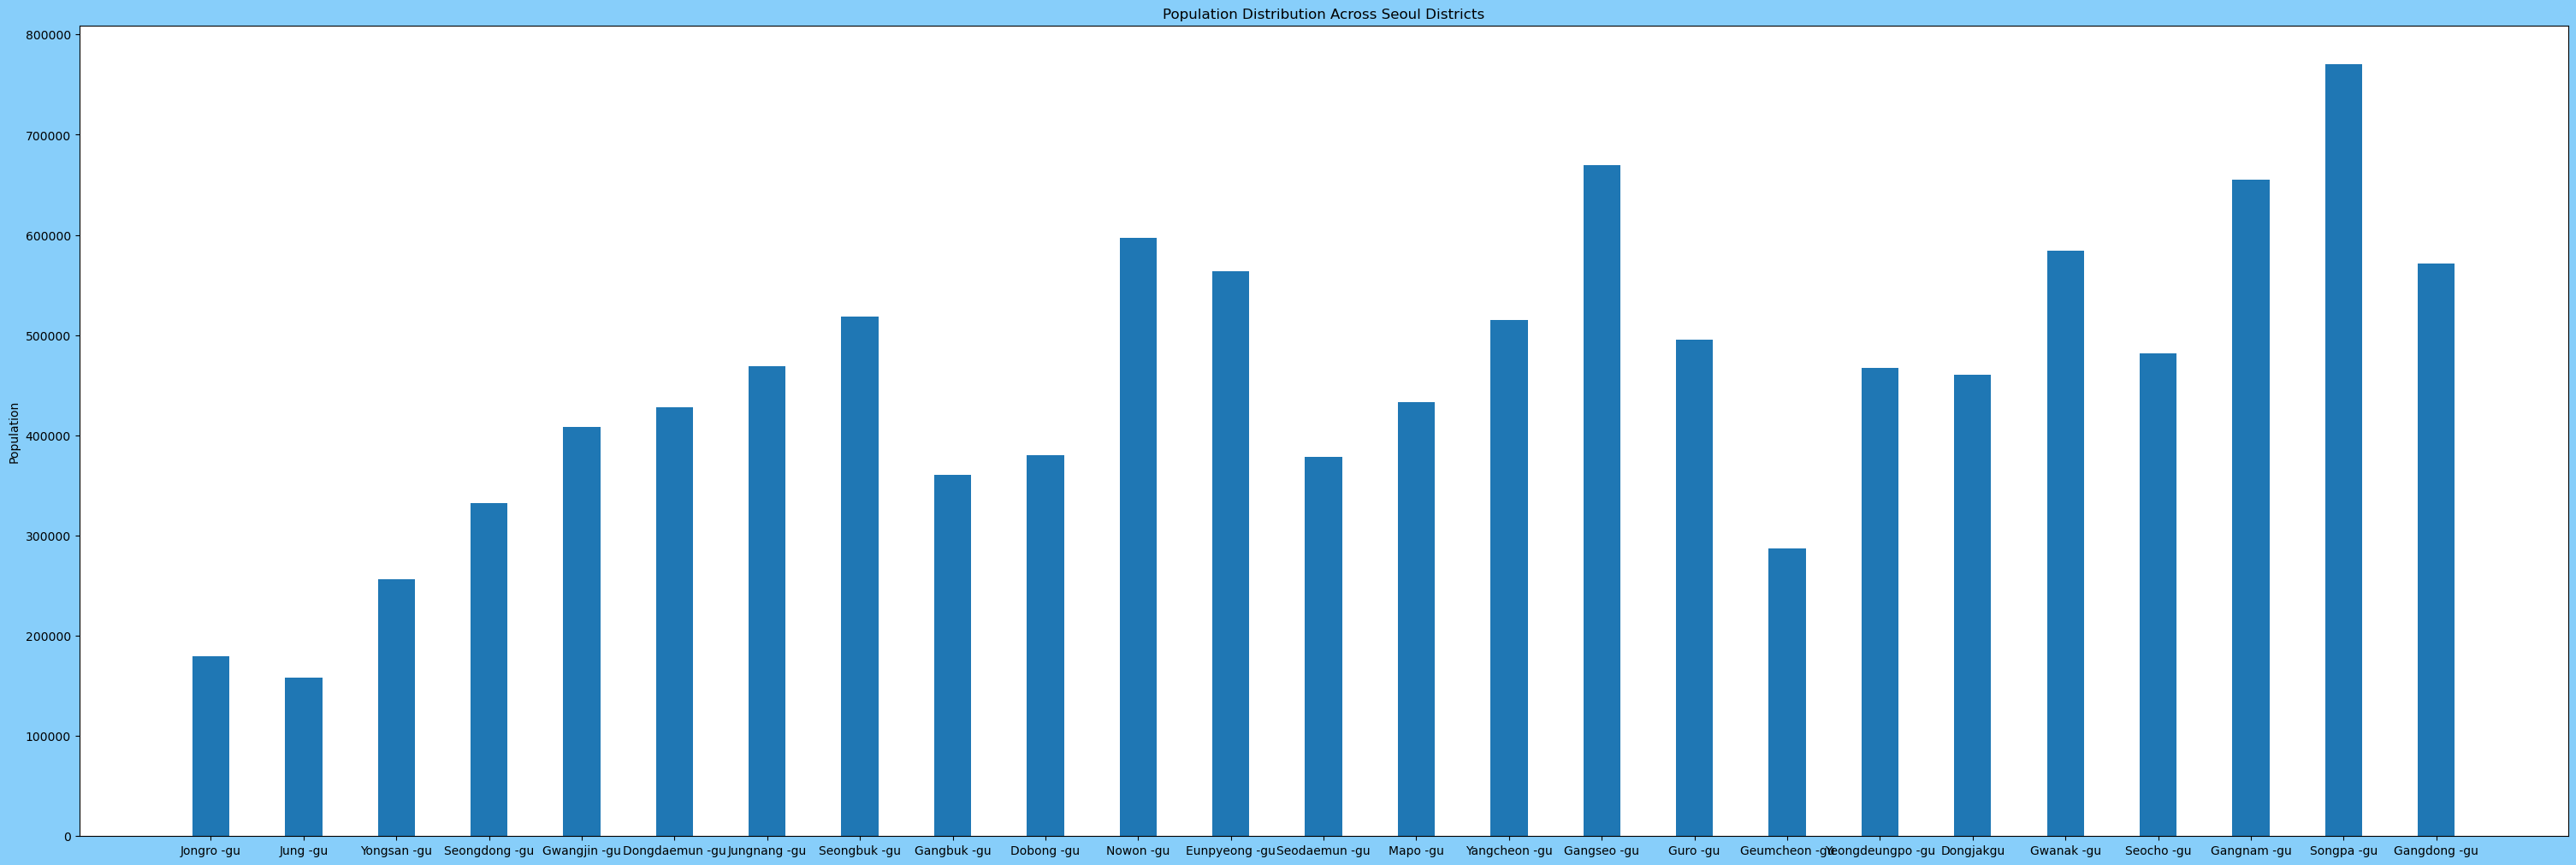

In [113]:
import matplotlib.pyplot as plt

city = population['District']
counts = population.iloc[:,1:].sum(axis=1)
width = 0.4

fig, ax = plt.subplots(figsize=(30, 10), facecolor='lightskyblue',layout='constrained')
ax.bar(city, counts, width)

ax.set_ylabel('Population')
ax.set_title('Population Distribution Across Seoul Districts')

plt.show()

In [115]:
population['Total'] = population.iloc[:,1:].sum(axis=1)

## Distribution of the Largest and Smallest Population Across Seoul Districts

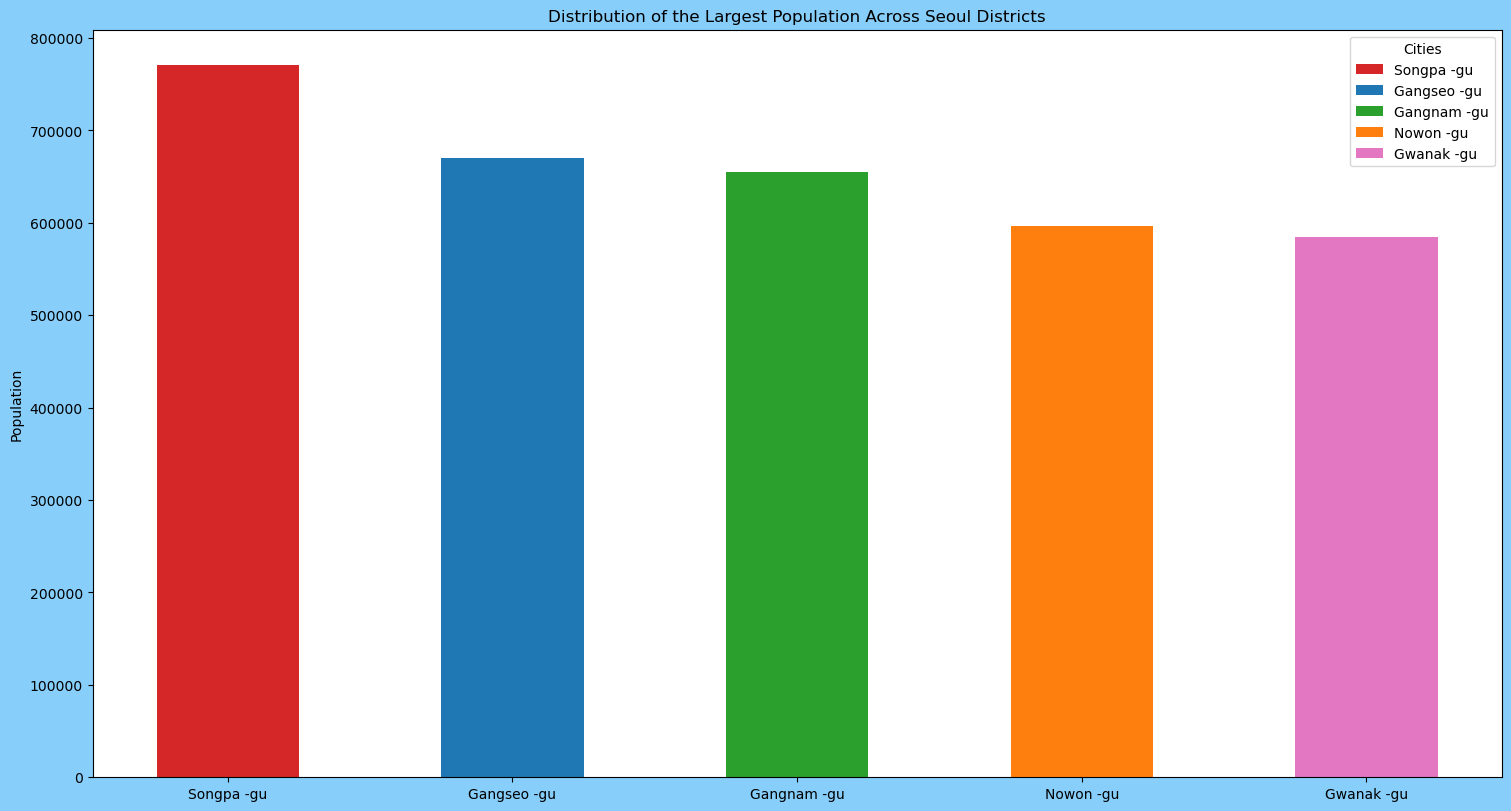

In [127]:
temp = population.sort_values(by='Total', ascending=False).reset_index(drop=True).head()

fig, ax = plt.subplots(figsize=(15, 8), facecolor='lightskyblue',layout='constrained')
city = temp['District']
counts = temp['Total']
bar_labels = temp['District']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink' ]
width = 0.5


ax.bar(city, counts, width,label=bar_labels, color=bar_colors)

ax.set_ylabel('Population')
ax.set_title('Distribution of the Largest Population Across Seoul Districts')
ax.legend(title='Cities')

plt.show()

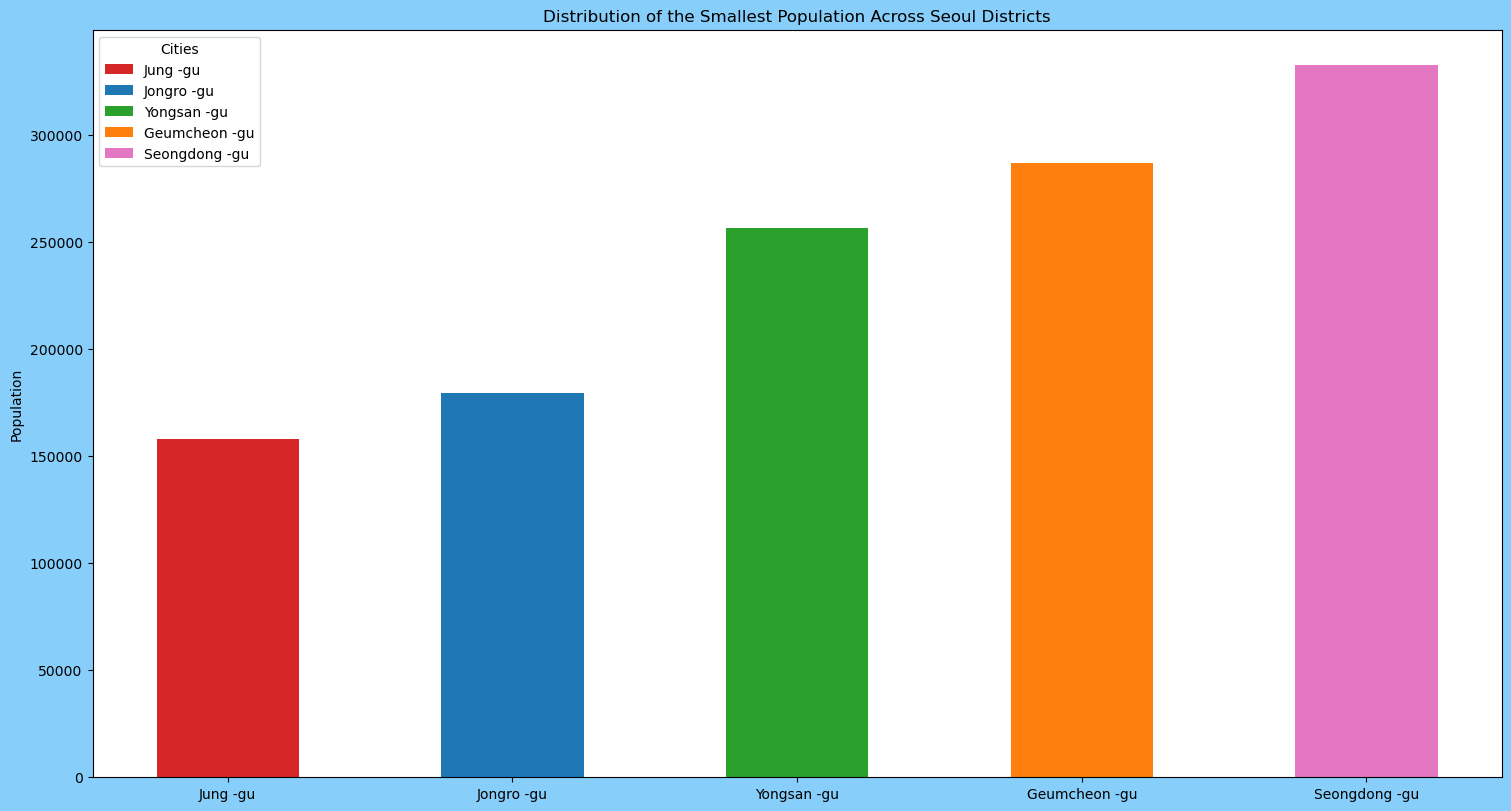

In [128]:
temp = population.sort_values(by='Total', ascending=True).reset_index(drop=True).head()

fig, ax = plt.subplots(figsize=(15, 8), facecolor='lightskyblue',layout='constrained')
city = temp['District']
counts = temp['Total']
bar_labels = temp['District']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink' ]
width = 0.5


ax.bar(city, counts, width,label=bar_labels, color=bar_colors)

ax.set_ylabel('Population')
ax.set_title('Distribution of the Smallest Population Across Seoul Districts')
ax.legend(title='Cities')

plt.show()

## Section B

## Read the CCTV file

In [32]:
df = pd.read_excel("./../DataFiles/CCTVs for all districts in Seoul until 20240630.xlsx", usecols = 'B, C, D, E, F, G, H, I, J, K, L, M')

In [33]:
df.head()

,구분,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,계,102380,11692,8225,10865,10652,12854,11838,9558,9218,13919,3559
1,종로구,2290,230,100,140,140,66,233,85,219,919,158
2,중 구,3021,376,220,366,381,155,357,414,137,135,480
3,용산구,3300,106,295,491,147,335,473,486,413,492,62
4,성동구,4514,542,278,939,457,640,483,366,233,471,105


In [34]:
df = df.drop([0])

In [35]:
df = df.reset_index(drop=True)

In [36]:
df.head()

,구분,총 계,2016년 이전 설치된 CCTV,2016년,2017년,2018년,2019년,2020년,2021년,2022년,2023년,2024년
0,종로구,2290,230,100,140,140,66,233,85,219,919,158
1,중 구,3021,376,220,366,381,155,357,414,137,135,480
2,용산구,3300,106,295,491,147,335,473,486,413,492,62
3,성동구,4514,542,278,939,457,640,483,366,233,471,105
4,광진구,4156,403,42,666,460,712,191,740,273,340,329


## Translate the columns

In [37]:
df = df.rename(columns=dict(zip(df.columns, [translator.translate(each, src='ko', dest='en').text for each in df.columns])))

In [38]:
df.head()

,division,Total system,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,종로구,2290,230,100,140,140,66,233,85,219,919,158
1,중 구,3021,376,220,366,381,155,357,414,137,135,480
2,용산구,3300,106,295,491,147,335,473,486,413,492,62
3,성동구,4514,542,278,939,457,640,483,366,233,471,105
4,광진구,4156,403,42,666,460,712,191,740,273,340,329


In [39]:
## Make sure you have the ENG words for the same KOR words
df = df.rename(columns={'Total system':'Total', 'division':'District'})

In [40]:
df.head()

,District,Total,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,종로구,2290,230,100,140,140,66,233,85,219,919,158
1,중 구,3021,376,220,366,381,155,357,414,137,135,480
2,용산구,3300,106,295,491,147,335,473,486,413,492,62
3,성동구,4514,542,278,939,457,640,483,366,233,471,105
4,광진구,4156,403,42,666,460,712,191,740,273,340,329


## Remove the space between the words to get an accurate translation.

In [41]:
df.loc[1, 'District'] = df['District'][1][0::2]

In [42]:
df.head()

,District,Total,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,종로구,2290,230,100,140,140,66,233,85,219,919,158
1,중구,3021,376,220,366,381,155,357,414,137,135,480
2,용산구,3300,106,295,491,147,335,473,486,413,492,62
3,성동구,4514,542,278,939,457,640,483,366,233,471,105
4,광진구,4156,403,42,666,460,712,191,740,273,340,329


## Translate the District names

In [43]:
df['District'] = [translator.translate(each, src='ko', dest='en').text for each in df['District']]

In [44]:
df.head()

,District,Total,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Jongno -gu,2290,230,100,140,140,66,233,85,219,919,158
1,Jung -gu,3021,376,220,366,381,155,357,414,137,135,480
2,Yongsan -gu,3300,106,295,491,147,335,473,486,413,492,62
3,Seongdong -gu,4514,542,278,939,457,640,483,366,233,471,105
4,Gwangjin -gu,4156,403,42,666,460,712,191,740,273,340,329


## Correct a minor translation error

In [45]:
df['District'][0] = 'Jongro -gu'

In [46]:
df.head()

,District,Total,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Jongro -gu,2290,230,100,140,140,66,233,85,219,919,158
1,Jung -gu,3021,376,220,366,381,155,357,414,137,135,480
2,Yongsan -gu,3300,106,295,491,147,335,473,486,413,492,62
3,Seongdong -gu,4514,542,278,939,457,640,483,366,233,471,105
4,Gwangjin -gu,4156,403,42,666,460,712,191,740,273,340,329


## Save it as an excel file

In [47]:
df.to_excel('./../DataFiles/CCTV in Seoul.xlsx', index=False)

## Save it as CCTV

In [48]:
cctv = df

## Which district in Seoul has the fewest and most CCTVs?

In [49]:
cctv.sort_values(by='Total', ascending=False).reset_index(drop=True).head()

,District,Total,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Gangnam -gu,7721,1486,1280,981,735,787,913,505,588,446,0
1,Gwanak -gu,5842,1025,607,675,663,889,404,549,135,602,293
2,Guro -gu,5449,607,332,535,537,780,749,683,337,497,392
3,Seocho -gu,5395,779,514,1022,422,339,419,565,878,457,0
4,Eunpyeong -gu,5027,841,493,361,579,979,386,520,481,387,0


In [50]:
cctv.sort_values(by='Total', ascending=True).reset_index(drop=True).head()

,District,Total,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Jongro -gu,2290,230,100,140,140,66,233,85,219,919,158
1,Dobong -gu,2378,3,68,80,152,149,156,552,557,661,0
2,Jung -gu,3021,376,220,366,381,155,357,414,137,135,480
3,Nowon -gu,3111,592,304,160,207,318,383,213,161,626,147
4,Geumcheon -gu,3170,92,130,196,539,366,514,207,304,822,0


## Can we make it as a bar chart?

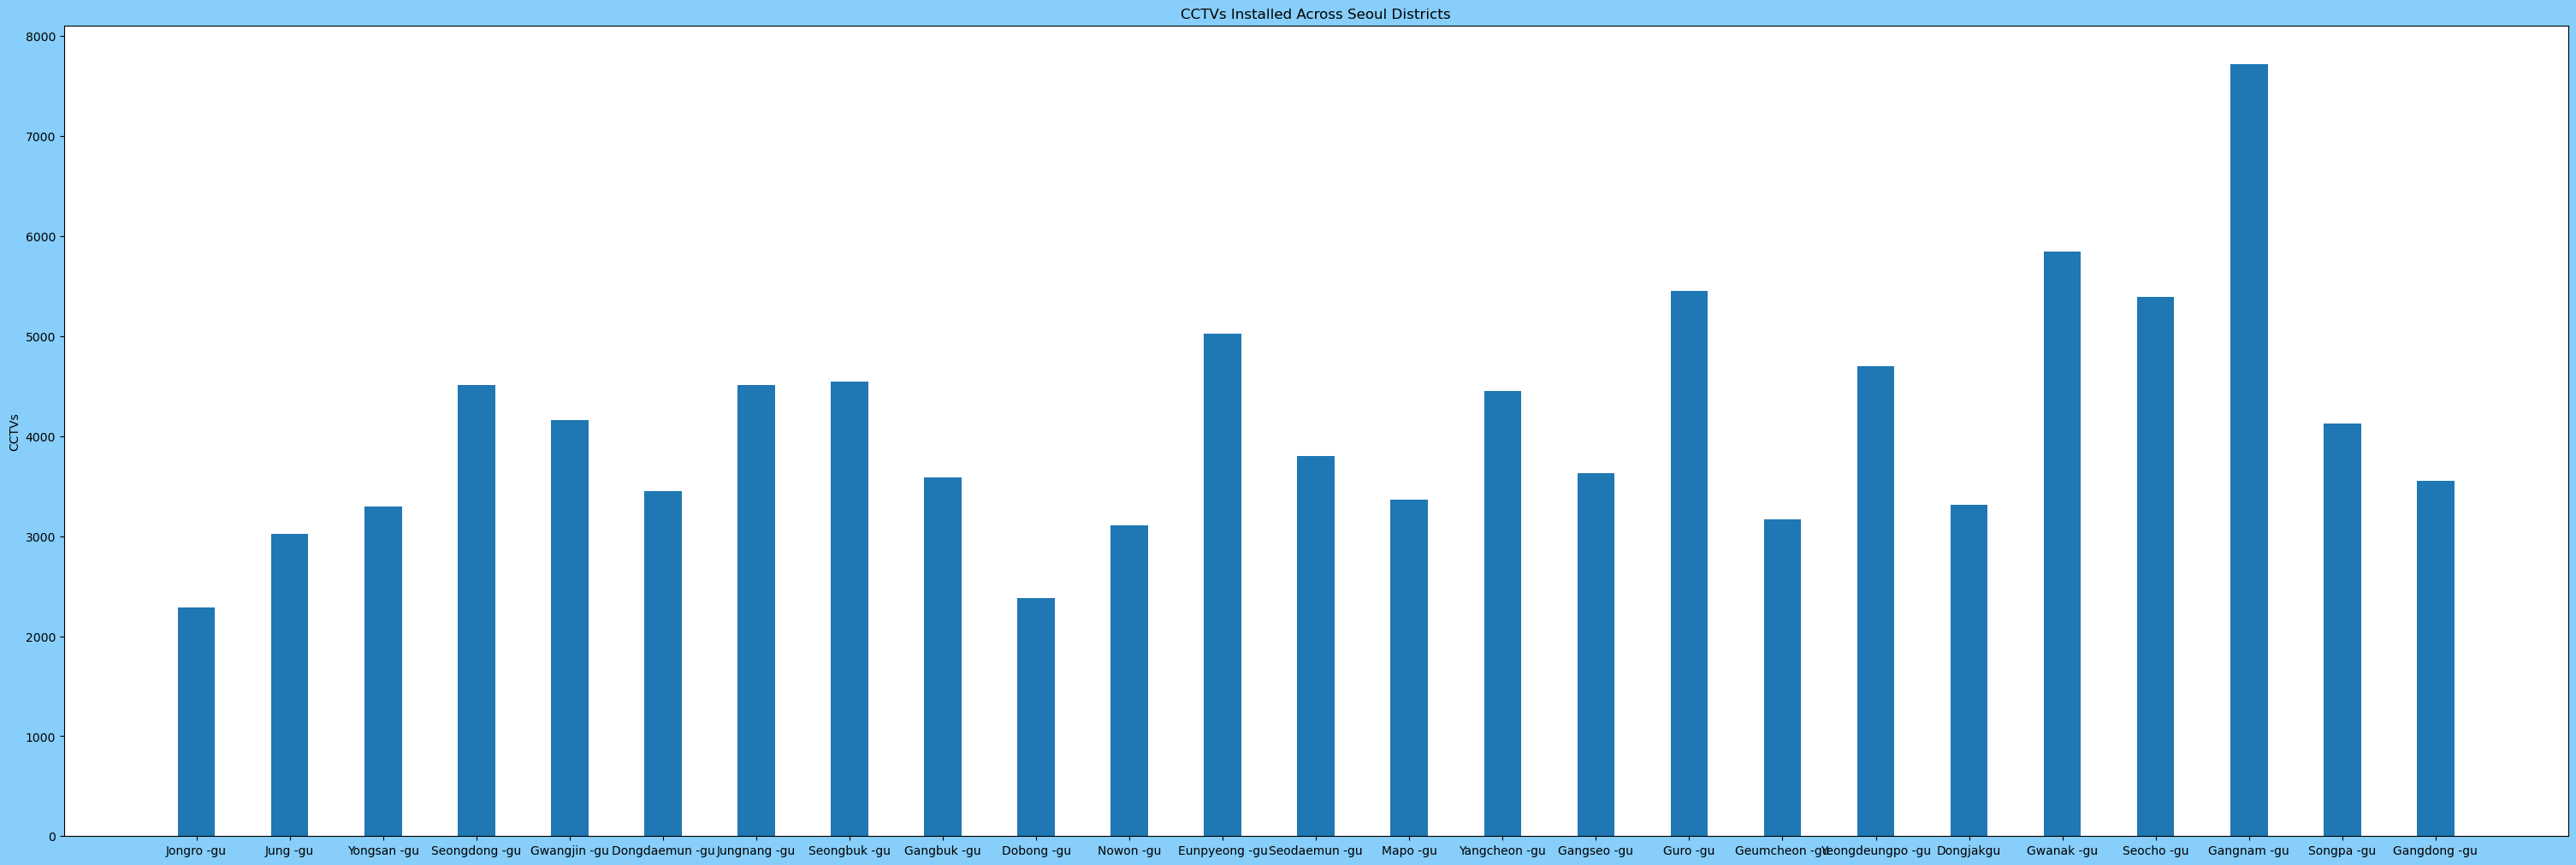

In [54]:
import matplotlib.pyplot as plt

city = cctv['District']
counts = cctv['Total']
width = 0.4

fig, ax = plt.subplots(figsize=(30, 10), facecolor='lightskyblue',layout='constrained')
ax.bar(city, counts, width)

ax.set_ylabel('CCTVs')
ax.set_title('CCTVs Installed Across Seoul Districts')

plt.show()

## Calculate the growth rate of CCTVs.

In [56]:
cctv['Growth Rate in 5 Years'] = (cctv['2020']+cctv['2021']+cctv['2022']+cctv['2023']+cctv['2024'])/(cctv['CCTV installed before 2016'] + cctv['2016'] + cctv['2017'] + cctv['2018'] + cctv['2019']) * 100

In [58]:
cctv.sort_values(by='Growth Rate in 5 Years', ascending=False).reset_index(drop=True).head()

,District,Total,CCTV installed before 2016,2016,2017,2018,2019,2020,2021,2022,2023,2024,Growth Rate in 5 Years
0,Dobong -gu,2378,3,68,80,152,149,156,552,557,661,0,426.106195
1,Jongro -gu,2290,230,100,140,140,66,233,85,219,919,158,238.757396
2,Yongsan -gu,3300,106,295,491,147,335,473,486,413,492,62,140.174672
3,Geumcheon -gu,3170,92,130,196,539,366,514,207,304,822,0,139.606954
4,Gangbuk -gu,3584,44,196,1,352,942,552,410,658,376,53,133.485342


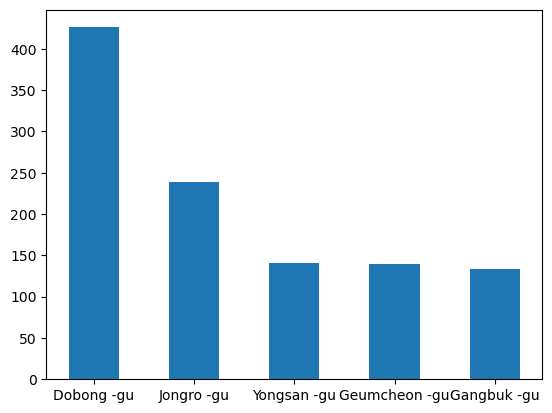

In [63]:
target = cctv.sort_values(by='Growth Rate in 5 Years', ascending=False).reset_index(drop=True).head()
plt.bar(target['District'],target['Growth Rate in 5 Years'],width=0.5)
plt.show()

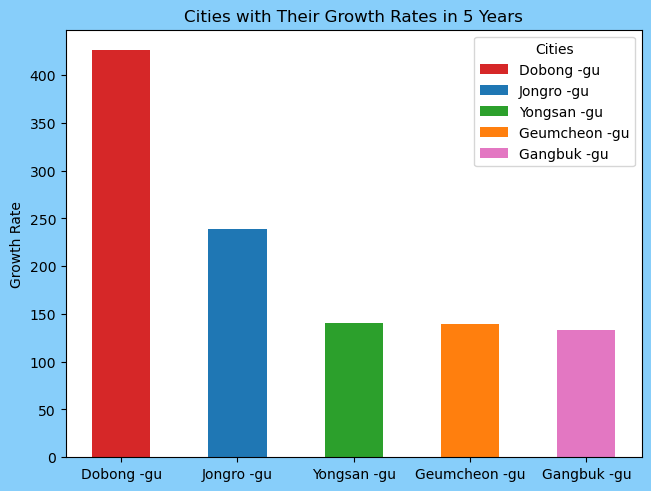

In [64]:
fig, ax = plt.subplots(facecolor='lightskyblue',layout='constrained')

city = target['District']
counts = target['Growth Rate in 5 Years']
bar_labels = target['District']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange', 'tab:pink' ]
width = 0.5


ax.bar(city, counts, width,label=bar_labels, color=bar_colors)

ax.set_ylabel('Growth Rate')
ax.set_title('Cities with Their Growth Rates in 5 Years')
ax.legend(title='Cities')

plt.show()

## Merge the two dataframes for further analysis

,District,Total,CCTV installed before 2016_x,2016_x,2017_x,2018_x,2019_x,2020_x,2021_x,2022_x,...,CCTV installed before 2016_y,2016_y,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2023_y,2024_y
0,Jongno -gu,2290,230,100,140,140,66,233,85,219,...,230,100,140,140,66,233,85,219,919,158
1,Dobong -gu,2378,3,68,80,152,149,156,552,557,...,3,68,80,152,149,156,552,557,661,0
2,Geumcheon -gu,3170,92,130,196,539,366,514,207,304,...,92,130,196,539,366,514,207,304,822,0
